# COSE474-2024F : Deep Learning HW1

## 0.1 Instalataion

In [ ]:
!pip install d2l==1.0.3

## 2.1 Data manipulation

In [ ]:
import torch

In [ ]:
x = torch.arange(12, dtype = torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X = x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X.shape

torch.Size([3, 4])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3, 4)

tensor([[ 2.4026, -0.3071,  0.8836,  0.2825],
        [-1.0350, -0.3601,  2.2547, -2.0187],
        [ 0.0088, -0.9572, -0.4475,  0.5912]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 2.2 Data Preprocessing

### 2.2.1 Reading the Dataset

In [ ]:
# make directory and write csv file

import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
# import pandas and load the dataset with read_csv.

import pandas as pd


data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2 Data Preparation

- Supervised learning, we train models to predict a designated target value, given some set of input values.

- We can treat NaN as a category.


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na = True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


- For missing numerical values, one common heuristic is to replace the NaN entries with the mean value.

In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3 Conversion to the Tensor Format

In [ ]:
# load data into tensor

import torch

X = torch.tensor(inputs.to_numpy(dtype = float))
y = torch.tensor(targets.to_numpy(dtype = float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 2.2.4 Discussion
- Now know how to partition data columns, impute missing variables, and load pandas data into tensors.

In [ ]:
# make directory and write csv file

import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
# import pandas and load the dataset with read_csv.

import pandas as pd


data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na = True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [ ]:
# load data into tensor

import torch

X = torch.tensor(inputs.to_numpy(dtype = float))
y = torch.tensor(targets.to_numpy(dtype = float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

- Data set can get hairy. Our data set might be spread across multiple file extracted from a relational database.

- Data visualization tools such as seaborn, Bokeh, or matplotlib can help you to manually inspect the data and develop intutions about the type of problems you may need to address.

### 2.2.5 Exercises


1. Try loading datasets, e.g, Abalone from the UCI Machine Learning Repository. and inspect their properties. What fraction of them has missing values? What fraction of the variavles is numerical, categorical, or text?

In [ ]:
import pandas as pd

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

cols = ["Sex", "Length", "Diameter", "Height", "Whole_weight",
        "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]

abalone = pd.read_csv(URL, names=cols)

abalone.isna().mean()

numerical = round(abalone.select_dtypes(include=["number"]).shape[1] / abalone.shape[1], 3)
categorical = round(abalone.select_dtypes(include=["object"]).shape[1] / abalone.shape[1], 3)
numerical, categorical

(0.889, 0.111)

2. Try Indexing and selecting data columns by name rather than by colun number. The pandas documentation on indexing has further details on how to do this

In [ ]:
abalone[["Sex", "Length", "Diameter"]].head() # == abalone.iloc[:, :3].head()

,Sex,Length,Diameter
0,M,0.455,0.365
1,M,0.350,0.265
2,F,0.530,0.420
3,M,0.440,0.365
4,I,0.330,0.255


4. How would you deal with data that has a very lage number of categories? What if the category labels are all unique? Should you include the latter?

- For data with a very large number of categories, we could use frequency encoding or mean encoding
- If the category labels are all unique, we could consider grouping by similar categories, or discard it if this feature does not provide any generailizale information.

5. What alternatives to pandas can you think of? How about loading Numpy tensors from a fie? Check out Pillow, the Python Imaging Library

- Polars (process large DataFrames faster)

## 2.3 Linear Algebra

In [ ]:
import torch

### 2.3.1 Scalars

We calll the values(maniulated numbers) scalars. We denote scalars by ordinary lower-cased letters and the space of all real-valued scalars by R. Scalars are implemented as tensors that contain only one element.

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 Vectors

We can think of a vector as a fixed-length array of scalars. Vectors are implemeted as 1st-order tensors. In general, such tensors can have arbitrary lengths, subject to memory limitations.

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

We can refer to an element of a vector by using a subscript.
Here $x_1, \dots, x_n$ are elements of the vector.


In [ ]:
x[2]

tensor(2)

In [ ]:
len(x) # dimensionality of vector

3

In [ ]:
x.shape # access the length cia the shape attribute

torch.Size([3])

### 2.3.3 Matrices

Matrices are 2nd order tensors. We denote matrices by bold capital letters (e.g, **X**, **Y**, and **Z**), andrepresent them in code by tensors with two axes.

In [ ]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

When we exchange a matrix's rows and columns, the result is called its *transpose*.  

$$
\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn} \\
\end{bmatrix}
$$


In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

Symmetric matrices are the subset of square matrices that are equal to their own transposes : $ A = A^\top $

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 Tensors

- Tensors give us a generic way of describing extensions to nth-order arrays. We call softwqre objects of the tensor class "tensors" preciesly because they too can have arbitrary numbers of axes.
- We denote general tensors by capital letters with a special font face(e.g., **X**, **Y**, and **Z**) and their indexing mechanism follows naturally from that of matrices.
-Tensors will vcome more inportant when we start working with images.

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 Basic Propeties of Tensor Arithmetic

Scalars, vectors, matrices, and higher-order tensors all have some handy properties.

In [ ]:
A = torch.arange(6, dtype = torch.float32).reshape(2,3)
B = A.clone() # Assign a copy of A to B by allocating new memory
A, A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))


\begin{bmatrix}
a_{11}b_{11} & a_{12}b_{12} & \dots  & a_{1n}b_{1n} \\
a_{21}b_{21} & a_{22}b_{22} & \dots  & a_{2n}b_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1}b_{m1} & a_{m2}b_{m2} & \dots  & a_{mn}b_{mn}
\end{bmatrix}




In [ ]:
A * B # elementwise product of two matrices

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
# Adding or multiplying a scalar
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6 Reduction

To express the sum of the elements in a vector $x$ of length $n$, we write $\sum_{i=1}^{n} x_i$.

In [ ]:
x = torch.arange(3, dtype = torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

To express sums over the elements of tensors of arbitrary shape, we simply sum over all its axes. The sum of the elements of an $m \times n$ matrix **A** could ve written $\sum_{i = 1}^m \sum_{j=1}^{n} a_{ij}$

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

 when summing over a specific axis of the input tensor, the information about that axis is removed from the shape of the output

In [ ]:
A.shape, A.sum(axis = 0).shape # reduce the dimension of rows

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis = 1).shape # reduce the dimension of columns

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0,1]) == A.sum() # Same as A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7 Non-Reduction Sum

It can be useful to keep the numver of axes unchaned when invoking the function for calculating the sum or mean.

In [ ]:
sum_A = A.sum(axis =1, keepdims = True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

If we want to calculate the cumulative sum of elemnts of A along some axis, say $axis = 0$ we can call the cumsum function.

In [ ]:
A.cumsum(axis = 0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8 Dot Products

Given two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^d$, their dot product $\mathbf{x}^\top \mathbf{y}$ (also known as inner product, $\langle \mathbf{x}, \mathbf{y} \rangle$) is a sum over the products of the elements at the same position:

$$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i.$$


In [ ]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x * y)

tensor(3.)

### 2.3.9 Matrix-Vector Products

The matrix–vector product $\mathbf{A}\mathbf{x}$ is simply a column vector of length $m$, whose $i^{\text{th}}$ element is the dot product $\mathbf{a}_i^\top \mathbf{x}$:

$$
\mathbf{A}\mathbf{x} = \begin{bmatrix}
\mathbf{a}_1^\top \\
\mathbf{a}_2^\top \\
\vdots \\
\mathbf{a}_m^\top
\end{bmatrix} \mathbf{x}
= \begin{bmatrix}
\mathbf{a}_1^\top \mathbf{x} \\
\mathbf{a}_2^\top \mathbf{x} \\
\vdots \\
\mathbf{a}_m^\top \mathbf{x}
\end{bmatrix}.
$$


In [ ]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

2.3.10 Matrix-Matirx Multiplication


C = AB = \begin{bmatrix}
a_1^\top b_1 & a_1^\top b_2 & \cdots & a_1^\top b_m \\
a_2^\top b_1 & a_2^\top b_2 & \cdots & a_2^\top b_m \\
\vdots & \vdots & \ddots & \vdots \\
a_n^\top b_1 & a_n^\top b_2 & \cdots & a_n^\top b_m
\end{bmatrix}



In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11 Norms

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [ ]:
torch.abs(u).sum() # l2norm -> less sensitive to outliers

tensor(7.)

In [ ]:
torch.norm(torch.ones(4, 9))

tensor(6.)

### 2.3.12 Discussion

This section covers the essential linear algebra needed for understanding deep learning. (Though there is much more to explore that can be beneficial for machine learning, such as matrix decompositions.)

### 2.3.13 Exercises

6. Run A / A.sum(axis = 1) and see what happens. Can you analyze the reason?

In [ ]:
A / A.sum(axis = 1)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

- The shapes mismatch. Order of the tensors themselves is incompatible.

## 2.5 Automatic Differentiation

In [ ]:
import torch

### 2.5.1 A Simple Function

We are interested in differentiating the function $ y = 2x^Tx$ with respect to the column vector $x$

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In general, we avoid allocating new memory every time. Deep learning requires succesively computing derivatives with the same parameters, and we might risk running out of memory.

In [ ]:
# can also create x = torch.arange(4.0, requires_grad = True)
x.requires_grad_(True)
x.grad # the gradient is None by default

In [ ]:
y = 2 * torch.dot(x, x) # calculate function of x & assign the result to y
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward() # take the gradient of y with respect to x
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

Let's calculate another function of x and take its gradient.
- Pytorch does not automatically reset the gradient buffer when we record a new gradient. Instead the new gradient is added to the already-stored gradient.
- To reset the gradient buffer, we can call x.grad.zero_()

In [ ]:
x.grad.zero_() # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2 Backward for Non-Scalar Variables

- The most representation of the derivative of y with respect to a vector x is a matrix called the *Jacobian* that contains the partial derivatives of each component of y with respect to each component of x.

- More commonly we want to sum up the gradients computed individually for example.

In [ ]:
x.grad.zero_() # reset the gradient
y = x * x
y.backward(gradient = torch.ones(len(y))) # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3 Detaching Computation

Sometimes, we wish to move some calculations outside of the recorded computational graph.

In [ ]:
x.grad.zero_() # reset the gradient
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4 Gradients and Python Control Flow

Programming offers us a lot more freedom in how we compute results. One benefit of using automatic differentiation is that even if building the computational graph of a function required complicated passing, we can still calculate the gradient of the resulting variable.

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [ ]:
a.grad == d / a

tensor(True)

### 2.5.5 Discussion

Automatic differentiation automates gradient calculations, boosting efficiency in deep learning. It simplifies model optimization, using techniques from compilers to ensure fast, memory-efficient computations.

### 2.5.6 Exercises

1. Why is the second derivative much more expensive to compute than the first derivative?

- The second derivative is more expensive to compute because it requires differentiating the gradient, adding complexity and increasing both computational cost and memory usage, especially for large functions.

3. In the conrol flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or matrix? At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(2,3), requires_grad=True)
# a = torch.tensor([1.0,2.0], requires_grad=True)
print(a)
d = f(a)
d.backward(d.detach())
print(a.grad)

tensor([[-0.3147,  0.5713, -1.4640],
        [-0.0094,  0.0106, -0.7091]], requires_grad=True)
tensor([[-3.3001e+09,  5.9910e+09, -1.5351e+10],
        [-9.8446e+07,  1.1078e+08, -7.4352e+09]])


## 3.1 Linear Regression

Regression problems pop up whenever we want to predict a numerical value.

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.1 Basics

- *Linear regression* is both implest and most popular among the standard tools for tackling regression problems.
- We assume that the relationship between features $x$ and traget $y$ is approximately linear. The conditional mean $E[Y | X = x]$ can be expressed as a weighted sum of the feature $x$.

#### 3.1.1.1 Model

Model describes how features can be transformed into an estimate of the target. The assumption of linearity means that the expected value of the target can be expressed as a weighted sum of the features.
$$ \hat{y} = w_1x_1 + ... + w_dx_d + b$$
$w_n$ is called weights, and b is called a bias. The bias determines the value of the estimate when all features are zero.

Collecting all features into a vector $\mathbf{x} \in \mathbb{R}^d$ and all weights into a vector $\mathbf{w} \in \mathbb{R}^d$, we can express our model compactly via the dot product between $\mathbf{w}$ and $\mathbf{x}$:

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

We will often find it convenient to refer to features of our entire dataset of $n$ examples via the design matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$. Here, $\mathbf{X}$ contains one row for every example and one column for every feature.

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b$$

The goal of linear regression is to find the wight vector $w$ and the bias term $b$.

Before we can go about searching gor the best *parameters* $w$ and $b$, we need two more things.
1. A measure of the quaility of some giben model
2. A procedure for updating the model to improve its quality


#### 3.1.1.2 Loss Function

*Loss functions* quantify the distance between the real and predicted values of the target. The loss will usually be anonnegative number where smaller values are better and perfect predictions incur a loss of 0.

The most common loss function is the squreaed error.
$$ l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2.$$
The constant 1/2 makes no real difference but proves to be notationally convenient.

To measure the quality of a model on the entire dataset of n examples, we simply average (or equivalently, sum) the losses on the training set.

$$L(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2.$$

When training the model, we seek parameters $\left( \mathbf{w}^*, b^* \right)$ that minimize the total loss across all training examples:

$$\mathbf{w}^*, b^* = \arg\min_{\mathbf{w}, b} L(\mathbf{w}, b).$$


####2.1.1.3 Analytic Solution

Linear regression presents us with a surprisingly easy optimization problem. As long as the design matrix $X$ has full rank, then there will be just one critical point on the loss surface and it corresponds to the minimum of the loss.
$$ \frac{\partial \mathbf{w}} \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2 = 2 \mathbf{X}^\top (\mathbf{Xw} - \mathbf{y}) = 0 \quad \text{and hence} \quad \mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{X} \mathbf{w}.$$

Solving for $w$ provides us with the optimal solution for the optimization problem.

(only be unique when the matirx $X^TX$ is invertible.)

$$\mathbf{w}^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$


#### 3.1.1.4 Minibatch Stochastic Gradient Descent

Hard-to-optiize models turn out to be so much better that figuring out how to train them ends up being well worth the trouble.

Consist of iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function(*Gradient Descent*).

In its most basic form, in each iteration $t$, we first randomly sample a minibatch $\mathcal{B}_t$ consisting of a fixed number $|\mathcal{B}|$ of training examples. We then compute the derivative (gradient) of the average loss on the minibatch with respect to the model parameters. Finally, we multiply the gradient by a predetermined small positive value $ \eta$(the learning rate), and subtract the resulting term from the current parameter values.

$$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \frac{\eta}{|{B}|} \sum_{i \in B_t} \partial{(\mathbf{w}, b)} l^{(i)}(\mathbf{w}, b).$$

In summary, minibatch SGD proceeds as follows:
1. Initialize the values of the model parameters, typically at random;
2. Iteratively sample random minibatches from the data, updating the parameters in the direction of the negative gradient.

\begin{align}
    \mathbf{w} &\leftarrow \mathbf{w} - \frac{\eta}{|B|} \sum_{i \in B_t} \partial_wl^{(i)}(\mathbf{w}, b)
    = \mathbf{w} - \frac{\eta}{|B|} \sum_{i \in B_t} \mathbf{x}^{(i)} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right), \tag{3.1.11} \\
    b &\leftarrow b - \frac{\eta}{|B|} \sum_{i \in B_t} \partial_b l^{(i)}(\mathbf{w}, b)
    = b - \frac{\eta}{|B|} \sum_{i \in B_t} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right).
\end{align}

Since we pick a minibatch $B$, we need to normalize by its size $B$. Frequently minibatch size and learning rate are user-defined. Such tunable parameters that are not updated in the training loop are called *hyperparameters*.

Linear regression has a global minimum when the design matrix is full rank, but deep networks have complex loss surfaces. However, we only need parameters that yield accurate predictions and low loss.


#### 3.1.1.5 Predictions

 In deep learning, prediction is often called inference, but this term usually refers to drawing conclusions from evidence, including parameter estimation. This misuse can confuse statisticians, so we'll use "prediction" when possible.

### 3.1.2 Vectorization for Speed

When we training our model we want to process whole minibaches simultaneously. Doing this efficiently requires that vectorizing the calculations and leverage fast linear algebra librariles.

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
# using a for-loop
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.11922 sec'

In [ ]:
# Alternatively we rely on the reloaded +
# operator to compute the elementwise sum
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00031 sec'

Second method is way faster than the first. Vectorizing code often yeilds order-of-magnitude speedups.

### 3.1.3 The Normal Distribution and Squared Loss

Normal distributuon with $mean$ and $variance$
$$N(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

In [ ]:
def normal(x, mu, sigma):
  p = 1 / math.sqrt(2 * math.pi * sigma**2)
  return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

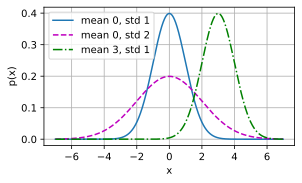

In [ ]:
# visualize the normal distributions

# use Numpy again for visualization
x = np.arange(-7, 7, 0.01)

# mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel = 'x',
         ylabel = 'p(x)', figsize = (4.5, 2.5),
         legend = [f'mean {mu}, std {sigma}' for mu, sigma in params])

$$ y = w^Tx + b + \epsilon$$

### 3.1.4 Linear Regression as a Neural Network

Linear models are too simple to capture complex relationships, but neural networks can represent them, including linear models as a single-layer network. In this setup, each input feature corresponds to an input neuron connected to a single output neuron. Linear regression can thus be viewed as a fully connected single-layer neural network, with only one output for predicting a numerical value. More complex networks will be explored in later chapters.

### 3.1.5 Discussion

- Model describes how features can be transformed into an estimate of the target. The assumption of linearity means that the expected value of the target can be expressed as a weighted sum of the features.
$$ \hat{y} = w_1x_1 + ... + w_dx_d + b$$
$w_n$ is called weights, and b is called a bias. The bias determines the value of the estimate when all features are zero.
- When we training our model we want to process whole minibaches simultaneously. Doing this efficiently requires that vectorizing the calculations and leverage fast linear algebra librariles.
- Normal distributuon with $mean$ and $variance$
$$N(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$
- $y = w^Tx + b + \epsilon$

### 3.1.6 Exercises

2. Prove that the affine functions that can be expressed by
 are equivalent to linear functions on $(x, 1)$.

In [ ]:
import torch

def ex2(w, x, b):
    result_by_affine = torch.mm(x.T,w)+b
    print("result_by_affine:\n",result_by_affine)
def ex2_linear(w, x, b):
    b_in_row = torch.ones(x.shape[1]).unsqueeze(0)
    x_and_one = torch.cat((x,b_in_row),0)
    w_and_b = torch.cat((w,torch.tensor([b]).unsqueeze(0)),0)

    result_by_linear = torch.mm(x_and_one.T, w_and_b)
    print("result_by_linear:\n",result_by_linear)

w = torch.tensor([1.,2.]).unsqueeze(1)
x = torch.randn([2,3])
b = 3.
ex2(w,x,b)
ex2_linear(w,x,b)

result_by_affine:
 tensor([[4.4986],
        [0.5282],
        [0.6324]])
result_by_linear:
 tensor([[4.4986],
        [0.5282],
        [0.6324]])


## 3.2 Object-Oriented Design for Implementation

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1 Utilities

In [ ]:
# To simplify object-oriented programming in Jupyter notebooks

def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
# implemnet a class with a method do.
class A:
  def __init__(self):
    self.b = 1

a = A()

In [ ]:
@add_to_class(A)
def do(self):
  print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [ ]:
# Saves all arguments in a class's __init__ method as class attributes
class HyperParameters:
  """The base class of hyperparameters."""
  def save_hyperparameters(self, ignore = []):
    raise NotImplemented

In [ ]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
# To plot experiment progress interactively while it is going on
# Draw method plots a pint (x, y) in the figure, with label

class ProgressBoard(d2l.HyperParameters):
  """The board that plots data points in animation."""
  def __init__(self, xlabel = None, ylabel = None, xlim = None,
               ylim = None, xscale = 'linear', yscale = 'linear',
               ls = ['-', '--', '-.', ':'], colors = ['c0', 'c1', 'c2', 'c3'],
               fig = None, axes = None, figszie = (3.5, 2.5), display = True):
    self.save_hyperparameters()

    def draw (self, x, y, label, every_n = 1): # every_n smooths the line
      raise NotImplemented

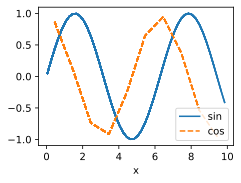

In [ ]:
# Draw sin and cos with a different smoothness

board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2 Models

The Module class is the base class of all models.

In [ ]:
# epoch는 모든 훈련 데이터를 한 번 사용하여 모델을 학습하는 단위
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3 Data

The DataModule class is thebase class for data. A data loader is a generator that yields a data batch each time it is used.

In [ ]:
class DataModule(d2l.HyperParameters):
  """The base class of data."""
  # To prepare the data
  def __init__(self, root = '../data', num_workers = 4):
    self.save_hyperparameters()

  def get_dataloader(self, train):
    raise NotImplementedError
  # Returns the data loader for the training dataset
  def train_dataloader(self):
    return self.get_dataloader(train = True)
  # To reutrn the validation dataset loader
  def val_dataloader(self):
    return self.get_dataloader(train = False)

### 3.2.4 Training

The Trainer class trains the learnable parameters in the Module class with data specified in DataModule.

In [ ]:
class Trainer(d2l.HyperParameters):
  """The base class for training models with data."""
  def __init__(self, max_epochs, num_gpus = 0, gradient_clip_val = 0):
    self.save_hyperparameters()
    assert num_gpus == 0, 'No GPU support yet'

  def prepare_data(self, data):
    self.train_dataloader = data.train_dataloader()
    self.val_dataloader = data.val_dataloader()
    self.num_train_batches = len(self.train_dataloader)
    selfnum_val_batches = (len(self.val_dataloader)
                           if self.val_dataloader is not None else 0)
  def prepare_model(self, model):
    model.trainer = self
    model.board.xlim = [0, self.max_epochs]
    self.model = model
  # Accepts two arguments: model, an instance of Module and data, an instance of DataModule
  # Iterates over the entire dataset max_epochs times to train the model
  def fit(self, model, data):
    self.prepare_data(data)
    self.prepare_model(model)
    self.optim = model.configure_optimizers()
    self.epoch = 0
    self.train_batch_idx = 0
    self.val_batch_idx = 0
    for self.epoch in range(self.max_epochs):
      self.fit_epoch()

  def fit_epoch(self):
      raise NotImplementedError

### 3.2.5 Discussion

- The DataModule class is thebase class for data. A data loader is a generator that yields a data batch each time it is used.

- The Module class is the base class of all models.

- The Trainer class trains the learnable parameters in the Module class with data specified in DataModule.

## 3.4 Linear Regression Implementation form Scratch

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1 Defining the Model

We can optimize our model's parameters by minibatch SGD, we need to have some parameters in the first place.

In [ ]:
class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [ ]:
# Define our model, relating its input and parameters to its output
@d2l.add_to_class(LinearRegressionScratch)
# Add a vector and a scalar
def forward(self, X):
  return torch.matmul(X, self.w) + self.b

### 3.4.2 Defining the Loss Function

Updating our model requires taking the gradient of our loss function, we ought to define the loss function first.

In [ ]:
# Transform the true value y into the predicted value's shape y_hat and return the averaged loss
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3 Defining the Optimization Algorithm

Linear regression has a closed-form solution. But our goal is to illustrate how to train more general neural networks, and that needs to teach how to use minibatch SGD.

In [ ]:
# Define SGD class, a subclass of d2l

class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
# Define the he configure_optimizers method,
# which returns an instance of the SGD class.
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4 Training

We will execute the following loop:
- Initialize parameters $(w, b)$
- Repeat until done
  - Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w}, b)} \frac{1}{|B|} \sum_{i \in B} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
  - Updatae parmeters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$


In [ ]:
# Pass the validation dataloader once in each epoch
# To measure the model performance
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

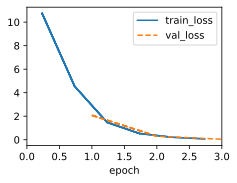

In [ ]:
# Use SyntheticRegressionData class and pass in some ground truth parameters
# lr = 0.03 and max_epochs = 3
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)


In [ ]:
# Not tkae the ability to exactly recover the ground truth parameters for granted
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0737, -0.1854])
error in estimating b: tensor([0.2262])


Even on difficult optimization problems, stochastic gradient descent can often find remarkably good solutions, owing partly to the fact that, for deep networks, there exist many configurations of the parameters that lead to highly accurate prediction.

### 3.4.5 Discussion

- We can optimize our model's parameters by minibatch SGD, we need to have some parameters in the first place.
- Updating our model requires taking the gradient of our loss function, we ought to define the loss function first.
- Linear regression has a closed-form solution. But our goal is to illustrate how to train more general neural networks, and that needs to teach how to use minibatch SGD.
- We will execute the following loop:
  - Initialize parameters $(w, b)$
  - Repeat until done
    - Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w}, b)} \frac{1}{|B|} \sum_{i \in B} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    - Updatae parmeters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$


## 4.1 Softmax Regression

### 4.1.1 Classification

In general, classification problems do not come with natural orderings among the classes.

A one hot encoding is a vector with as many components as we have categories. The component corresponding to a particular instance's category is set to 1 and all other components are set to 0.

#### 4.1.1.1 Linear Model

In order to estimate the conditional probabilities associated with all the possible classes, we need a model with multiple outputs, one per class.

Just as in linear regression, we use a single-layer neural network.

For a more concise notation we use vectors and matrices: $o = Wx + b$
 is much better suited for mathematics and code.

#### 4.1.1.2 The Softmax

Assuming a suitable loss function, we could try, directly, to minimize the difference between $o$ and the labels $y$.

- There is no guarantee that outputs $o_i$ sum up to 1 in the way we expecte probabilities to behave.
- There is no guarantee that the outputs $o_i$ are even nonnegative, even if their outputs sum up to 1, or that they don't exceed 1.

Both aspects render the estimation problem difficult to solve and the solution very brittle to outliers.

We can transform values so that they add up to 1 by dividing each by their sum. This process is caleed *normalizaiton*.

$$\hat{\mathbf{y}} = \text{softmax}(\mathbf{o}) \quad \text{where} \quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}$$

Note that the largest coordinate of $o$ corresponds to the most likely class according to $\hat{y}$.

We don't need to compute the softmax to determine which class has been assigned the highest probability. (The sofmax operation preserves the ordering among its arguments)

$$ argmax{\hat{y_j}} = argmax{O_j}$$


#### 4.1.1.3 Vectorization

To improve computational efficiency, we vectorize calculations in minibatches of data.
$$ O = XW + b$$
$$ \hat{Y} = softmax(O)$$
This accelerates the dominant operation into a matrix-matrix product $XW$.

- that care must be taken to avoid exponentiating and taking logarithms of large numbers, since this can cause numerical overflow or underflow. Deep learning frameworks take care of this automatically.

### 4.1.2 Loss Function

 We have a mapping from features $x$ to probabilities $\hat{y}$, we need a way to optimize the accuracy of this mapping.

#### 4.1.2.1 Log-Likelihood

The softmax function gives us a vector $\hat{y}$, which we can interptret as the conditional probabilities of each class.

We assume that for a dataset with features $X$ the labels $Y$ are represented using a one-hot encoding label vector.

$$P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^{n} P(y^{(i)} \mid \mathbf{x}^{(i)}).$$


We are allowed to use the factorization since we assume that each label is drawn independently from its respective distribution.


$$-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^{n} -\log P(y^{(i)} \mid \mathbf{x}^{(i)}) = \sum_{i=1}^{n} l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)})$$

where for any pair of label $y$ and model prediction $\hat{y}$ over $q$ classes, the loss function $l$ is


$$l(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{j=1}^{q} y_j \log \hat{y}_j.$$


The loss function is commonly called the $cross-entropy loss$.







### 4.1.3 Information Theory Basics

*Information theory* deals with the problem of encoding, decoding, transmitting, and manipulating information (also known as data).

#### 4.1.3.1 Entropy

The central idea in information theory is to quantify the amount of information contained in data. This places a limit on our ability to compress data.

$$ H[P] = \sum_j - P(j)logP(j).$$

### 4.1.4 Discussion

This section introduced the softmax function and cross-entropy loss for optimizing over discrete output spaces, highlighting their probabilistic foundation. It also touched on computational challenges in fully connected layers.


If it is always easy for us to predict the next token, then this data is easy to compress. It is easy to predict.

However, if we cannot perfectly predict every event, then our surprise is greater when an event is assigned lower probability. The entropy is then the *expected surprisal* when one assigned the correct probabilities that truly match the data-generating process.

### 4.1.5 Exercises

1. We can explore the connection between exponential familes and softmax in some more depth.
  1. Compute the second derivative of the corss-entropy loss for softmax
  2. Compute the variance of the distribution given by softmax.


- the second derivative(i = j)
$$\frac{\partial^2 L}{\partial z_i^2} = \hat{y}_i (1 - \hat{y}_i)$$

- the second derivative(i != j)
$$\frac{\partial^2 L}{\partial z_i \partial z_j} = -\hat{y}_i \hat{y}_j$$

- variance of distribution
$$\text{Var}(\hat{y}_i) = \hat{y}_i (1 - \hat{y}_i)$$


## 4.2 The Image Classification Dataset

In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1 Loading the Dataset

In [ ]:
class FashionMNIST (d2l.DataModule):
  """The Fashion-MNIST dataset."""
  def __init__(self, batch_size = 64, resize = (28, 28)):
    super(). __init__()
    self.save_hyperparameters()
    trans = transforms.Compose([transforms.Resize(resize),
                                transforms.ToTensor()])
    self.train = torchvision.datasets.FashionMNIST(
        root=self.root, train = True, transform = trans, download = True)
    self.val = torchvision.datasets.FashionMNIST(
        root = self.root, train = False, transform = trans, download = True)

Fashion-MNIST consists of images from 10 categories, each represented by 6000 images in the training daaset and by 1000 in the test dataset. A *test dataset* is used for evaluating model performance.

In [ ]:
data = FashionMNIST(resize = (32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:03<00:00, 6770060.20it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 134524.27it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2280496.72it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13287555.07it/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

By convention we store an image as a $c * h * w$ tensor, where $c$ is the number of color channels, $h$ is the height and $w$ is the width.

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

The following convenience method converts between numeric labels and their names.

In [ ]:
@d2l.add_to_class (FashionMNIST)
def text_labels(self, indices):
  """Return text labels."""
  labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [labels[int(i)] for i in indices]

### 4.2.2 Reading a Minibatch

To Recall the built-in data iterator at each iteration, a data iterator reads a minibatch of data with size batch_size.

In [ ]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
  data = self.train if train else self.val
  return torch.utils.data.DataLoader(data, self.batch_size, shuffle = train,
                                     num_workers = self.num_workers)

In [ ]:
# load a minibatch of images by invoking the train_dataloader method
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


It's not blazingly fast, but it's sufficient since processing images with a deep network takes a bit longer.

Hence it's good enough that training a network will not be I/O constraiend.

In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
  continue
f'{time.time() - tic:.2f}sec'

'14.05sec'

### 4.2.4 Visualization

In [ ]:
def show_images(imgs, num_rows, num_cols, titles = None, scale = 1.5):
  """Plot a list of images."""
  raise NotImplementedError

In general, it's a good idea to visualize and inspect data that you are training on.

Visualization serves as an additional safeguard against mistakes and errors in the design of experiments.

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, bath, nrows = 1, ncols = 8, labels = []):
  X, y = batch
  if not labels:
    labels = self.tex_labels(y)
  d2l.show_images(X.squeeze(1), nrows, ncols, titles = labels)
  batch = next(iter(data.val_dataloader()))
  data.visualize(batch)

### 4.2.4 Discussion

- To reading a mini batch is not blazingly fast, but it's sufficient since processing images with a deep network takes a bit longer. It's good enough that training a network will not be I/O constraiend.

- In general, it's a good idea to visualize and inspect data that you are training on.

- Visualization serves as an additional safeguard against mistakes and errors in the design of experiments.

### 4.2.5 Exercises

1. Does reducing the batch_size (for instance, to 1) affect the reading performance?

- Reducing the batch_size will make overall read performance slower.

  - batch size = 1 -> SGD
  - batch size = 256 -> MBGD

  MBGD is quicker because it use GPU to parallel read data.

## 4.3 The Base Classification Model

The implementations from scratch and the concise implementation using framework functionality were quite similar in the case of regression. The same is true for classification.

This section provieds a base class for classification models to simplify future code.

In [ ]:
import torch
from d2l import torch as d2l

### 4.3.1 The Classifier Class

In [ ]:
class Classifier(d2l.Module):
  """The base class of classification models."""
  def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    self.plot('loss', self.loss(Y_hat, batch[-1]), train = False)
    self.plot('acc', self.accuracy(Y_hat, batch[-1]), train = False)

In [ ]:
# By default using a stochastic gradient optimizer
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), lr = self.lr)

### 4.3.2 Accuracy

The classification accuracy is the fraction of all predictions that are correct.


Accuracy is computed as follows.
1. If y_hat is a matrix, we assume that the second dimension stores prediction scores for each class.
2. We use argmax to obtain the predicted class by the index for the largest entry in each row.
3. We compare the predicted class with the ground truth y elementwise.

In [ ]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged = True):
  """Compute the number of correct predictions."""
  Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
  preds = Y_hat.argmax(axis = 1).type(Y.dtype)
  compare = (preds == Y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

### 4.3.3 Discussion

- The implementations from scratch and the concise implementation using framework functionality were quite similar in the case of regression. The same is true for classification.

- This section provieds a base class for classification models to simplify future code.

- The classification accuracy is the fraction of all predictions that are correct.


- Accuracy is computed as follows.
  1. If y_hat is a matrix, we assume that the second dimension stores prediction scores for each class.
  2. We use argmax to obtain the predicted class by the index for the largest entry in each row.
  3. We compare the predicted class with the ground truth y elementwise.

### 4.3.4 Exercises

Show that the quick and dirty estimate $L$ is unbiased. That is, show that $[L_{\nu}] = E[L_{\nu}^{q}]$. Why would you still want to use $L_v$ instead?

$[L_{\nu}] = E[L_{\nu}^{q}]$

Prove:
두 추정값 $L_{\nu}$와 $L_{\nu}^{q}$는 동일한 데이터에서 샘플링된 추정치이므로, 그 기댓값은 동일

Why we using $L_{\nu}$:
$L_{\nu}^{q}$ = 계산이 빠르지만 정확성 면에서 $L_{\nu}$보다 낮음.
빠르고 대략적인 추정값은 통계적 변동성이 크기 때문에, 더 정확한 추정값을 얻고 싶을 때는 $L_{\nu}$ 를 사용하는 것이 바람직.


## 4.4 Softmax Regression Implemntation from Scartch

Softmax regression is so fundamental, we ought to know how to implement it ourselves.

In [ ]:
import torch
from d2l import torch as d2l

### 4.4.1 The Softmax

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims = True), X.sum(1, keepdims = True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

Computing the softmax requires three steps:

1. Exponentiation of each term
2. A sum over each row to compute the normalization constant for each example.
3. Division of each row by its normalization constant, ensuring that the result sums to 1

$$\text{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}$$

The dinominator is called the (log) *partition function*.


In [ ]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdims = True)
  return X_exp / partition
# The broadcasting mechanism is applied here

In [ ]:
X = torch.rand((2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.3378, 0.1677, 0.1663, 0.1578, 0.1704],
         [0.1916, 0.2149, 0.1936, 0.1589, 0.2411]]),
 tensor([1., 1.]))

### 4.4.2 The Model

In softmax regression, the number of outputs from our network should be equal to the number of classes.

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma = 0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad = True)

  def parameters(self):
    return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
  X = X.reshape((-1, self.W.shape[0]))
  return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3 The Cross-Entropy Loss

Cross-entropy takes the negative log-likelihood of the predicted probaility assigned to the true label. For efficiency we avoid Python for-loops and use indexing instead.

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
# implement the cross-entropy loss function by averaging over the selected probabilities
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

  cross_entropy(y_hat, y)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4 Trianing

We reuse the fit method to train the mdoel with 10 epochs.

Note that the number of epochs (max_epochs), the minibatch size (batch_size), and learning rate (lr) are adjustable hyperparameters.

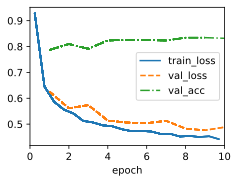

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5 Prediction

Training is complete, Our model is ready to classify some images

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis = 1)
preds.shape

torch.Size([256])

Visualize data by comparing their actual labels with the predictions from the model.

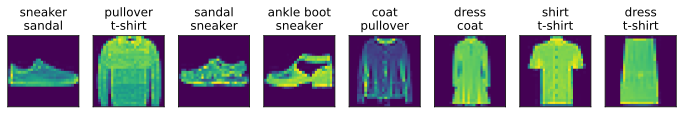

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

### 4.4.6 Discussion

- Cross-entropy takes the negative log-likelihood of the predicted probaility assigned to the true label. For efficiency we avoid Python for-loops and use indexing instead.
- Computing the softmax requires three steps:

  1. Exponentiation of each term
  2. A sum over each row to compute the normalization constant for each example.
  3. Division of each row by its normalization constant, ensuring that the result sums to 1

### 4.4.7 Exercises

3. Is it always a good idea to return the most likely label? For example, would you do this for medical diagnosis? How would you try to address this?

- In fields like medical diagnosis, it is not always the best idea to return the most likely label. This is because a misdiagnosis, even if unlikely, could have serious consequences for the patient. For example, if a rare but life-threatening disease is overlooked because the model assigns it a lower probability, it could lead to harmful outcomes.

## 5.1 Multilayer Perceptrons

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 5.1.1.1 Memo
1. Universal Approximators
- single-hidden layer network, given enough nodes(possible absurdly many), and the right set of weights, we can model any function.
- Kernel methods(SVM) are way more effective, since they are capable of solving the probelm exactly even in **infinite dimensional spaces** (Kimeldorf and Wahba, 1971, Scholkopf et al., 2001). "Universal Approximation Theorem"
- We can approximate any functions much more **compactly** by using deeper (rather than wider) networks (Simonyan and Zisserman, 2014).

$$\text{ReLU}(x)  = \max(x,0)$$

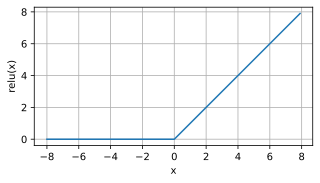

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

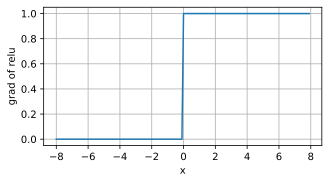

In [ ]:
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize = (5,2.5))

### 5.1.2.1 (Exercise) My own exercise/experiment

$$\text{pReLU}(x) = \max(0,x) + \alpha\min(o,x).$$

In [ ]:
pReLU = lambda x, a,: torch.max(torch.tensor(0), x) + a * torch.min(torch.tensor(0), x) #pReLU defined

In [ ]:
y = pReLU(x = x, a = 0.1)

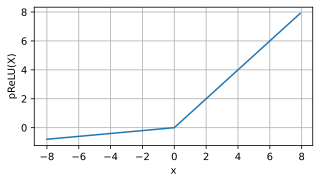

In [ ]:
d2l.plot(x.detach(), y.detach(), 'x', 'pReLU(X)', figsize = (5, 2.5))

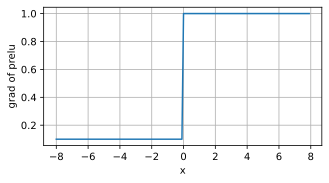

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of prelu', figsize = (5, 2.5))

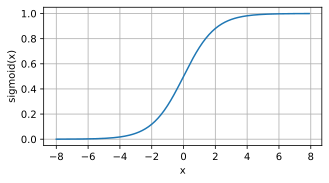

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5, 2.5))

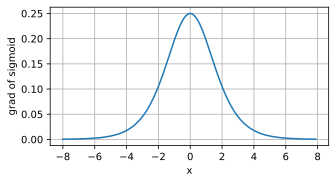

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize = (5, 2.5))

* Gradient Vanishing Problem ~ Backpropagation / Activation functions

### 5.1.2.3. Tanh Function (Discussion)
* $\tanh(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)} = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$


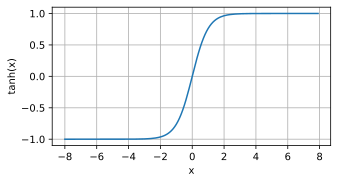

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize = (5, 2.5))

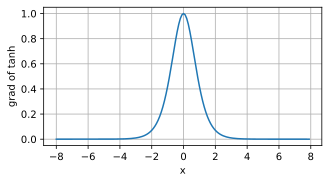

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize = (5, 2.5))

### 5.1.4 Discussions & Exercises

1. Universal Approximators
- single-hidden layer network, given enough nodes(possible absurdly many), and the right set of weights, we can model any function.
- Kernel methods(SVM) are way more effective, since they are capable of solving the probelm exactly even in **infinite dimensional spaces** (Kimeldorf and Wahba, 1971, Scholkopf et al., 2001). "Universal Approximation Theorem"
- We can approximate any functions much more **compactly** by using deeper (rather than wider) networks (Simonyan and Zisserman, 2014).

$$\text{ReLU}(x)  = \max(x,0)$$

### 5.1.2.1 (Exercise) My own exercise/experiment

$$\text{pReLU}(x) = \max(0,x) + \alpha\min(o,x).$$

### 5.1.2.3. Tanh Function (Discussion)
* $\tanh(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)} = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$


## 5.2 Implementation of Multilayer Perceptrons

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 5.2.1 Implementation from Scratch

#### 5.2.1.1 Initializing Model Parameters

We will implement an MLP with one hidden layer and 256 hidden units. Both the number of layers and their width are adjustable (they are considered hyperparameters.)


We will represent our parameters with several tensors. For every layer, we must keep track of one weight matrix and one bias vector.

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2 Model

We will implement the ReLU activation ourselves rather than invoking the built-in relu function directly.

In [ ]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

We reshape each two-dimensional image into a flat vector of lengthnum_inputs.

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3 Training

Training loop for MLPs is exactly the same as for softmax regression. We define the model, data, and trainer, then finally invoke the fit method on model and data

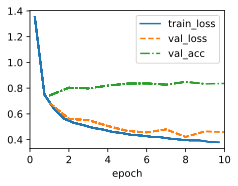

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2 Concise Implementation

#### 5.2.2.1 Model

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

#### 5.2.2.2 Training

The training loop is exactly the same as when we implemented softmax regression.

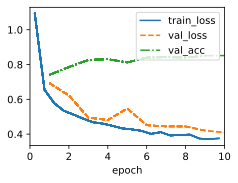

In [ ]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

### 5.2.3 Discussion

- We will implement an MLP with one hidden layer and 256 hidden units. Both the number of layers and their width are adjustable (they are considered hyperparameters.)


- We will represent our parameters with several tensors. For every layer, we must keep track of one weight matrix and one bias vector.

- Compared with our concise implementation of softmax regression implementation, the only difference is that we add two fully connected layers where we previously added only one. The first is the hidden layer, the second is the output layer.

### 5.2.4 Exercises

2. Try adding an additional hidden layer to see how it affects the results

In [ ]:
# increasing number of hidden layers

num_inputs = 784
num_outputs = 10

W1 = nn.Parameter(torch.randn(num_inputs, 128) * 0.01,requires_grad=True)

b1 = nn.Parameter(torch.zeros(128),requires_grad=True)

W2 = nn.Parameter(torch.randn(128, 64) * 0.01, requires_grad=True)

b2 = nn.Parameter(torch.zeros(64), requires_grad=True)

W3 = nn.Parameter(torch.randn(64,num_outputs)*0.01, requires_grad=True)

b3 = nn.Parameter(torch.zeros(num_outputs),requires_grad=True)

def net(X):

    X=X.reshape(-1,num_inputs)

    out = relu(torch.matmul(X,W1) + b1)

    out = relu(torch.matmul(out,W2)+b2)

    return torch.matmul(out,W3) + b3

## 5.3 Forward Propagation, Backward Propagation, and Computational Graphs

The automatic calculation of gradients profoundly simplifies the implementaition of deep learning algorithms.

In this section, we take a deep dive into the detials of backward propagation.

### 5.3.1 Forward Propagation

*Forward propagation* refers to the calculation and storage of intermediate variavles (including outputs) for a neural network in order from the input layer to the output layer.

Let's assume that the input example is  $\mathbf{x} \in \mathbb{R}^d$ and that our hidden layer does not include a bias term.

Intermediate variable is:

$$\mathbf{z} = \mathbf{W}^{(1)} \mathbf{x}$$

where $\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ is the weight parameter of the hidden layer.

After running the intermediate variable $\mathbf{z} \in \mathbb{R}^h$ through the activation function $\phi$, we obtain our hidden activation vector of length $h$:

$$\mathbf{h} = \phi(\mathbf{z}).$$

The hidden layer output $\mathbf{h}$ is also an intermediate variable. Assuming that the parameters of the output layer possess only a weight of $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$, we can obtain an output layer variable with a vector of length $q$:

$$\mathbf{o} = \mathbf{W}^{(2)} \mathbf{h}.$$

Assuming that the loss function is $l$ and the example label is $\mathbf{y}$, we can then calculate the loss term for a single data example.

$$L = l(\mathbf{o}, \mathbf{y}).$$

The definition of $\ell_2$ regularization, given the hyperparameter $\lambda$, the regularization term is

$$s = \frac{\lambda}{2} \left( \| \mathbf{W}^{(1)} \|_F^2 + \| \mathbf{W}^{(2)} \|_F^2 \right)$$

where the Frobenius norm of the matrix is simply the $\ell_2$ norm applied after flattening the matrix into a vector. Finally, the model’s regularized loss on a given data example is:

$$ J = L + s$$
We refer $J$ to as the objectiv function.




### 5.3.2 Computational Graph of Forward Propagation

Plotting *computational graphs* helps us visualize the dependencies of operators and variables within the calculation.

The lower-lteft corner signifies the input and the upper-right corner is the output.

The directions of the arrows are primarily rightward and upward.
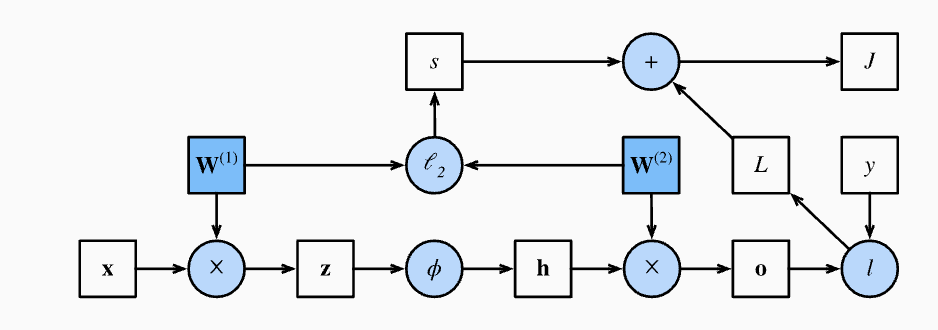

### 5.3.3 Backpropagation

*Backpropagation* refers to the method of calculating the gradient of neural network parameters.

The method reaverses the network in reverse order, from the output to the input layer, according to the *chain rule* from calculus.

Assume that we have functions $\mathbf{Y} = f(\mathbf{X})$ and $\mathbf{Z} = g(\mathbf{Y})$.

The input and the output $\mathbf{X}, \mathbf{Y}, \mathbf{Z}$ are tensors of arbitrary shapes. By using the chain rule, we can compute the derivative of $\mathbf{Z}$ with respect to $\mathbf{X}$.


$$\frac{\partial \mathbf{Z}}{\partial \mathbf{X}} = \text{prod} \left( \frac{\partial \mathbf{Z}}{\partial \mathbf{Y}}, \frac{\partial \mathbf{Y}}{\partial \mathbf{X}} \right).$$


Using the $\text{prod}$ operator to multiply its arguments after the necessary operations. It is simply matrix-matrix multiplication. For higher dimensional tensors, we use the appropriate counterpart. The operator $\text{prod}$ hides all the notational overhead.

The objective of backpropagation is to calculate the gradients $\frac{\partial J}{\partial \mathbf{W}^{(1)}}$ and $\frac{\partial J}{\partial \mathbf{W}^{(2)}}$.


To accomplish this, we apply the chain rule and calculate, in turn, the gradient of each intermediate variable and parameter. The order of calculations are reversed relative to those performed in forward propagation.

1. Calculate the gradients of the objective function $J = L + s$ with respect to the loss term $L$ and the regularization term $s$.

  $$\frac{\partial J}{\partial L} = 1 \quad \text{and} \quad \frac{\partial J}{\partial s} = 1.$$

2. Compute the gradient of the objective function with respect to the variable of the output layer $\mathbf{o}$ according to the chain rule.
  $$\frac{\partial J}{\partial \mathbf{o}} = \text{prod} \left( \frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}} \right) = \frac{\partial L}{\partial \mathbf{o}} \in \mathbb{R}^q.$$

3. Calculate the gradients of the regularization term with respect to both parameters.
  $$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)} \quad \text{and} \quad \frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$


4. Calculate the gradient $\frac{\partial J}{\partial \mathbf{W}^{(2)}} \in \mathbb{R}^{q \times h}$ of the model parameters closest to the output layer. (Using the chain rule)
  $$\frac{\partial J}{\partial \mathbf{W}^{(2)}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}} \right) + \text{prod} \left( \frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}} \right) = \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$

5. To obtain the gradient with respect to \$\mathbf{W}^{(1)}$, we need to continue backpropagation along the output layer to the hidden layer.
  $$ \frac{\partial J}{\partial \mathbf{h}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}} \right) = \mathbf{W}^{(2)\top} \frac{\partial J}{\partial \mathbf{o}}.$$

6. Since the activation function $\phi $ applies elementwise, calculating the gradient $\frac{\partial J}{\partial \mathbf{z}} \in \mathbb{R}^h$ of the intermediate variable $z$ requires that we use the elementwise multiplication operator.

  $$\frac{\partial J}{\partial \mathbf{z}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}} \right) = \frac{\partial J}{\partial \mathbf{h}} \odot \phi'(\mathbf{z}).$$

7. Obtain the gradient $\frac{\partial J}{\partial \mathbf{W}^{(1)}} \in \mathbb{R}^{h \times d}$ of the model parameters closest to the input layer.
  $$\frac{\partial J}{\partial \mathbf{W}^{(1)}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}} \right) + \text{prod} \left( \frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}} \right) = \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.$$


### 5.3.4 Training Neural Networks

For forward propagation, we traverse the computational graph in the dirction of dependencies and compute all the variables on its path. These are then used for backpropagation where the compute order on the graph is reversed.

When training neural networks, once model parameters are initailized, we alternate forward propagation with backpropagation, updaiting model parameters using fradients given by backpropagation.

### 5.3.5 Discussion

Forward propagation computes and stores intermediate variables from input to output, while backpropagation calculates gradients in reverse order. Both are interdependent during training, requiring more memory than prediction.

### 5.3.6 Exercises

My own exercise
- Why training requires significantly more memory than plain prediction?

- Training requires significantly more memory than plain prediction because during training, both the intermediate activations and their corresponding gradients need to be stored for each layer to perform backpropagation. In prediction, only the forward pass is necessary, so intermediate values can be discarded once computed, reducing memory usage.